In [19]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [20]:
data = load_breast_cancer()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
from sklearn.model_selection import train_test_split
X = dataset.copy() # input data
y = data['target'] # target 0 or 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) 

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(ccp_alpha=0.01, max_depth=4, max_features='sqrt', bootstrap=True, random_state=42)
clf = clf.fit(X_train, y_train)


In [23]:
# clf.get_params() # chech other parameters

In [24]:
predictions = clf.predict(X_test)
predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [25]:
# show difference between tree that doesn't have stopping criteria and the one that does
clf.predict_proba(X_test)

array([[0.0251152 , 0.9748848 ],
       [0.02007457, 0.97992543],
       [0.98371398, 0.01628602],
       [0.02014719, 0.97985281],
       [0.02033258, 0.97966742],
       [0.02386335, 0.97613665],
       [0.02101799, 0.97898201],
       [0.02002524, 0.97997476],
       [0.68007125, 0.31992875],
       [0.98448944, 0.01551056],
       [0.02321573, 0.97678427],
       [0.12979513, 0.87020487],
       [0.98517134, 0.01482866],
       [0.02002524, 0.97997476],
       [0.05073773, 0.94926227],
       [0.88663065, 0.11336935],
       [0.79939552, 0.20060448],
       [0.02101799, 0.97898201],
       [0.98517134, 0.01482866],
       [0.02002524, 0.97997476],
       [0.0267414 , 0.9732586 ],
       [0.98517134, 0.01482866],
       [0.91964281, 0.08035719],
       [0.03425451, 0.96574549],
       [0.91249235, 0.08750765],
       [0.21237057, 0.78762943],
       [0.03013106, 0.96986894],
       [0.02085222, 0.97914778],
       [0.02014719, 0.97985281],
       [0.02014719, 0.97985281],
       [0.

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9468085106382979

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[ 53,   7],
       [  3, 125]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.946969696969697

In [29]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.9765625

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.95      0.88      0.91        60
      benign       0.95      0.98      0.96       128

    accuracy                           0.95       188
   macro avg       0.95      0.93      0.94       188
weighted avg       0.95      0.95      0.95       188



In [31]:
feature_names = X.columns
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [32]:
clf.feature_importances_

array([0.0483814 , 0.00874169, 0.06913132, 0.04167941, 0.00345397,
       0.01310982, 0.08702394, 0.12480101, 0.00045685, 0.00188451,
       0.0109607 , 0.00105548, 0.00686544, 0.02962253, 0.00056491,
       0.00368178, 0.00465271, 0.00199233, 0.        , 0.00049657,
       0.07506037, 0.01485709, 0.09351558, 0.15675171, 0.00783426,
       0.01872247, 0.03317679, 0.13276453, 0.00465764, 0.00410317])

In [33]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
worst area,0.156752
worst concave points,0.132765
mean concave points,0.124801
worst perimeter,0.093516
mean concavity,0.087024
worst radius,0.075060
mean perimeter,0.069131
mean radius,0.048381
mean area,0.041679
worst concavity,0.033177


In [34]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['worst area',
 'worst concave points',
 'mean concave points',
 'worst perimeter',
 'mean concavity',
 'worst radius',
 'mean perimeter',
 'mean radius',
 'mean area',
 'worst concavity',
 'area error',
 'worst compactness',
 'worst texture',
 'mean compactness',
 'radius error',
 'mean texture',
 'worst smoothness',
 'perimeter error',
 'worst symmetry',
 'concavity error',
 'worst fractal dimension',
 'compactness error',
 'mean smoothness',
 'concave points error',
 'mean fractal dimension',
 'texture error',
 'smoothness error',
 'fractal dimension error',
 'mean symmetry']

<Axes: >

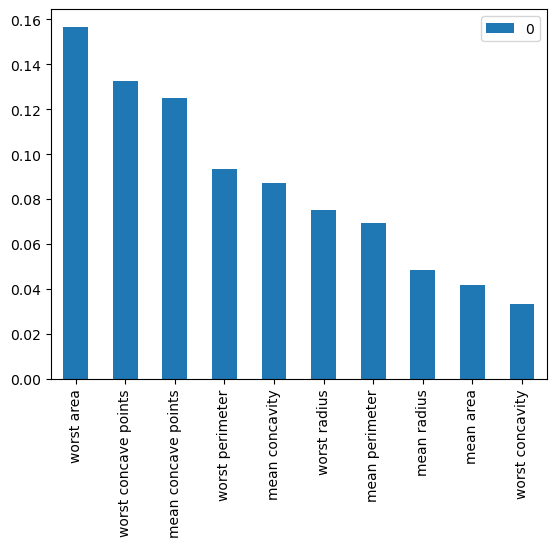

In [35]:
feature_importance.head(10).plot(kind='bar')

In [36]:
# Export the first three decision trees from the forest

#from sklearn.tree import export_graphviz
#import graphviz
#for i in range(3):
#    tree = clf.estimators_[i]
#    dot_data =  export_graphviz(tree,
#                               feature_names=load_breast_cancer().feature_names,
#                               #feature_names=X_train.columns  
#                               filled=True,  
#                               max_depth=2, 
#                               impurity=False, 
#                               proportion=True)
#    graph = graphviz.Source(dot_data)
#    display(graph)

#ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH